In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Prepare datasets for training

In [16]:
stream = "gd1"
df, file = load_file(stream = stream)

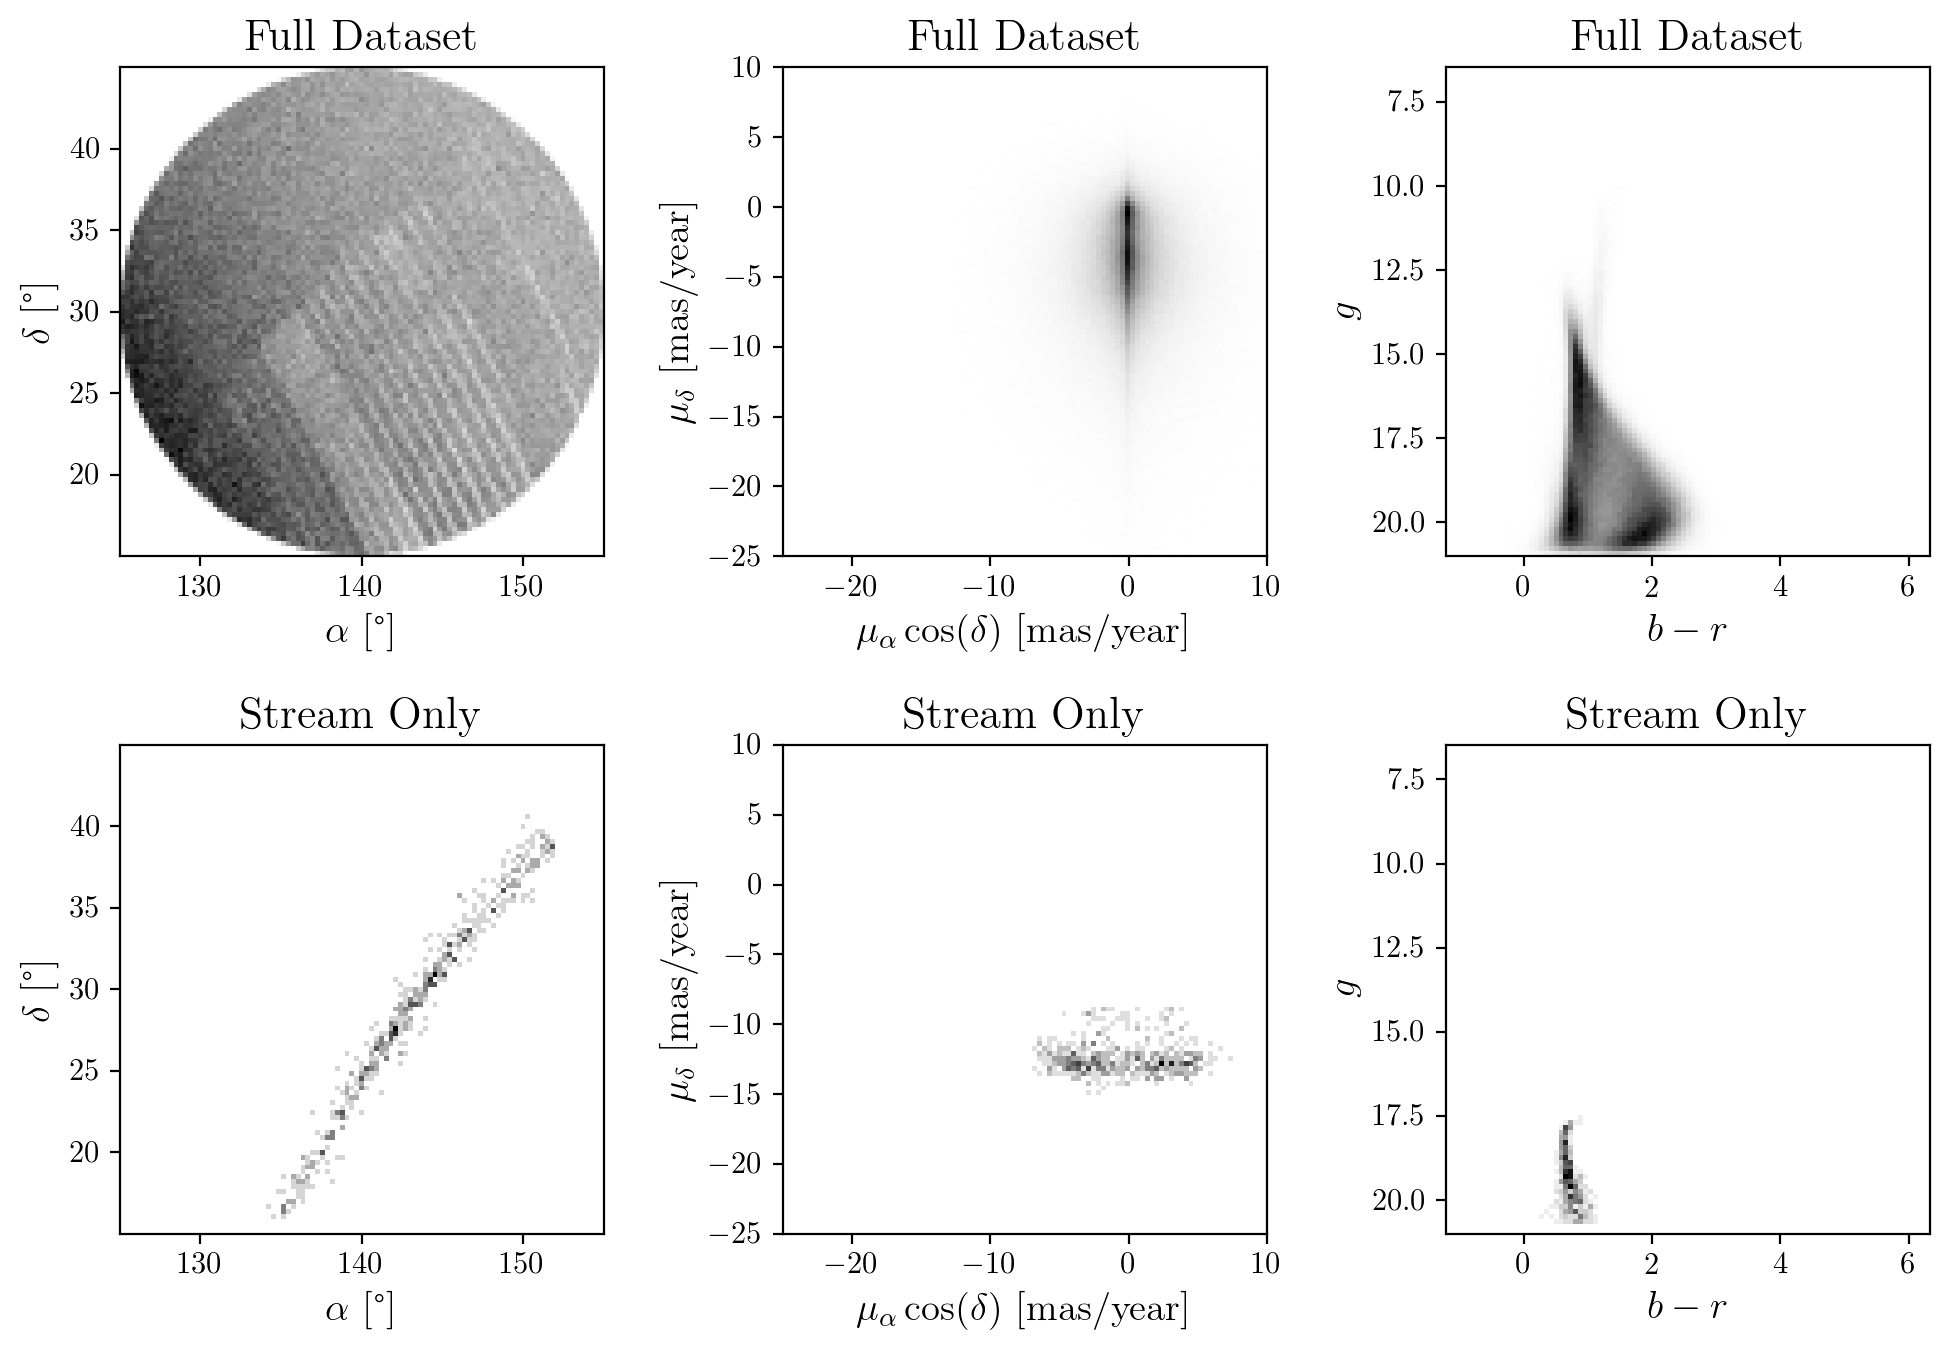

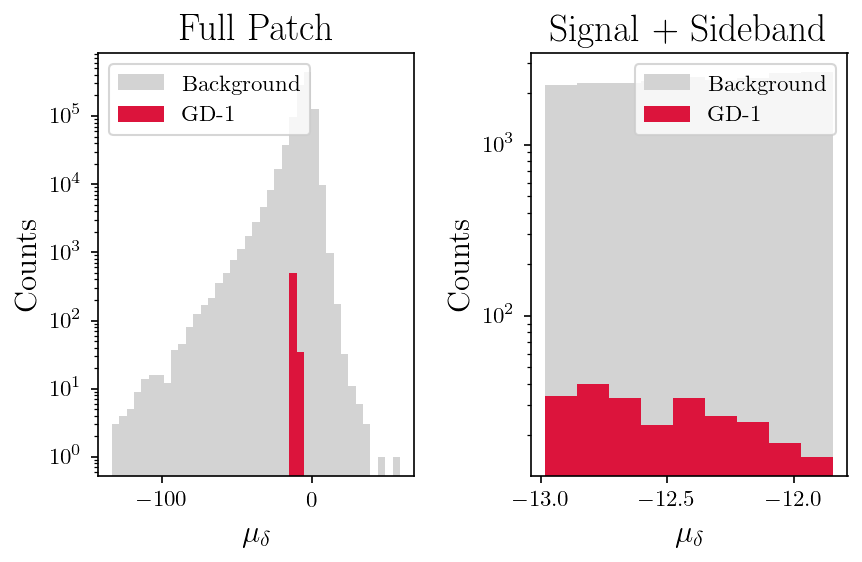

In [17]:
visualize_stream(df)

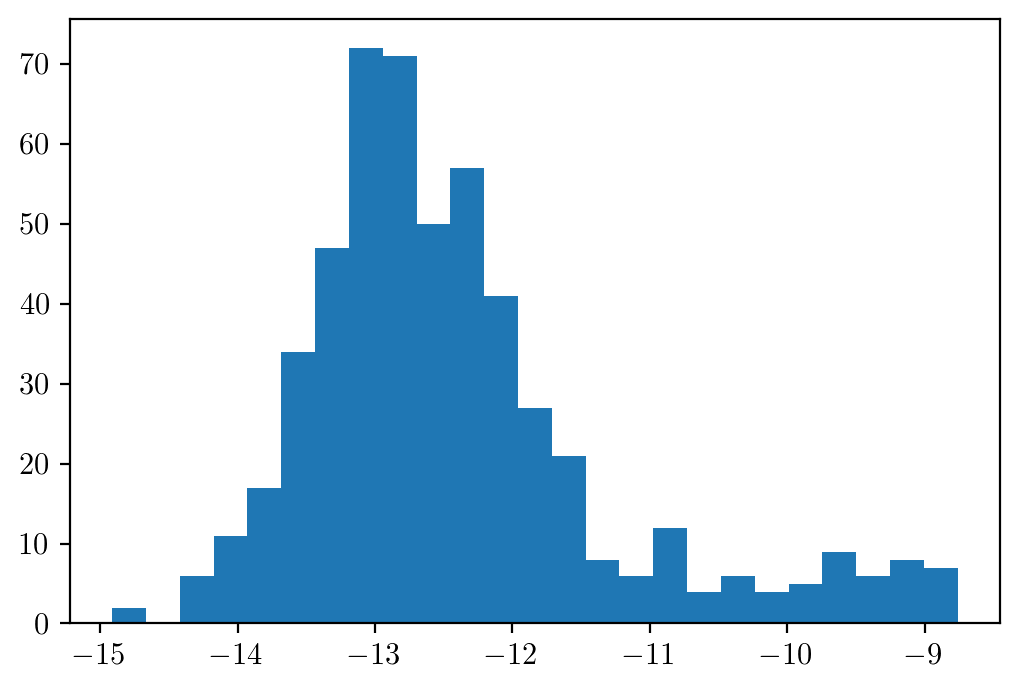

In [18]:
plt.figure(dpi=200)
plt.hist(df[df.stream].μ_δ, bins=25);

Sideband region: [-18.0,-9.5]
Signal region: [-15.0,-11.0]
Total counts: SR = 70,835, SB = 71,692
Signal region has 470 stream and 70,365 bkg events (0.67%).
Sideband region has 40 stream and 71,652 bkg events (0.06%).
f_sig = 12.0X f_sideband.


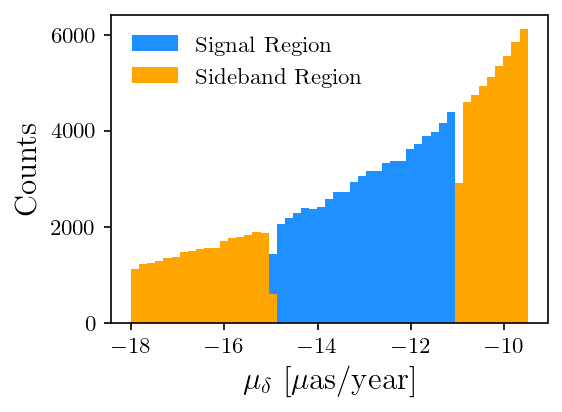

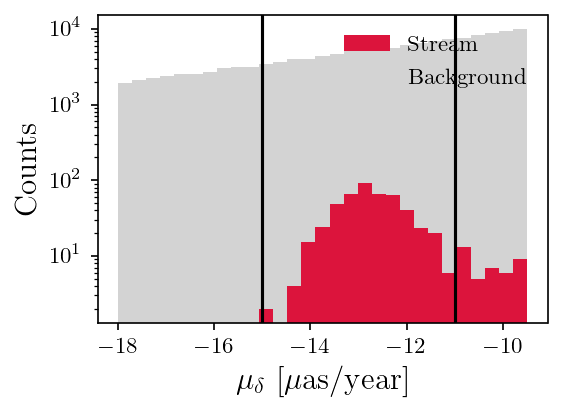

In [19]:
df = signal_sideband(df, stream = stream)

# Train

In [20]:
print("Dataframe has {:,} stars, of which {:,} are stream stars.".format(
    len(df), 
    len(df[df.stream])))

Dataframe has 142,527 stars, of which 510 are stream stars.


[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

891/891 [==============================] - 1s 785us/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [00:37<01:53, 37.75s/it]

891/891 [==============================] - 1s 749us/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [01:22<01:23, 41.80s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [01:58<00:39, 39.15s/it]

891/891 [==============================] - 1s 983us/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [00:36<01:48, 36.05s/it]

891/891 [==============================] - 1s 821us/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [01:12<01:12, 36.38s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [01:50<00:37, 37.09s/it]

891/891 [==============================] - 1s 970us/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

891/891 [==============================] - 1s 833us/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [00:44<02:12, 44.25s/it]

891/891 [==============================] - 1s 967us/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [01:29<01:29, 44.81s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [02:04<00:40, 40.36s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [00:39<01:59, 39.95s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [01:24<01:25, 42.81s/it]

891/891 [==============================] - 1s 856us/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [02:06<00:42, 42.23s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [00:29<01:28, 29.57s/it]

891/891 [==============================] - 1s 1ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [01:01<01:02, 31.16s/it]

891/891 [==============================] - 1s 818us/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [01:40<00:34, 34.45s/it]

891/891 [==============================] - 1s 1ms/step



[Step 1] k-fold: 100%|██████████| 5/5 [12:57<00:00, 155.49s/it]


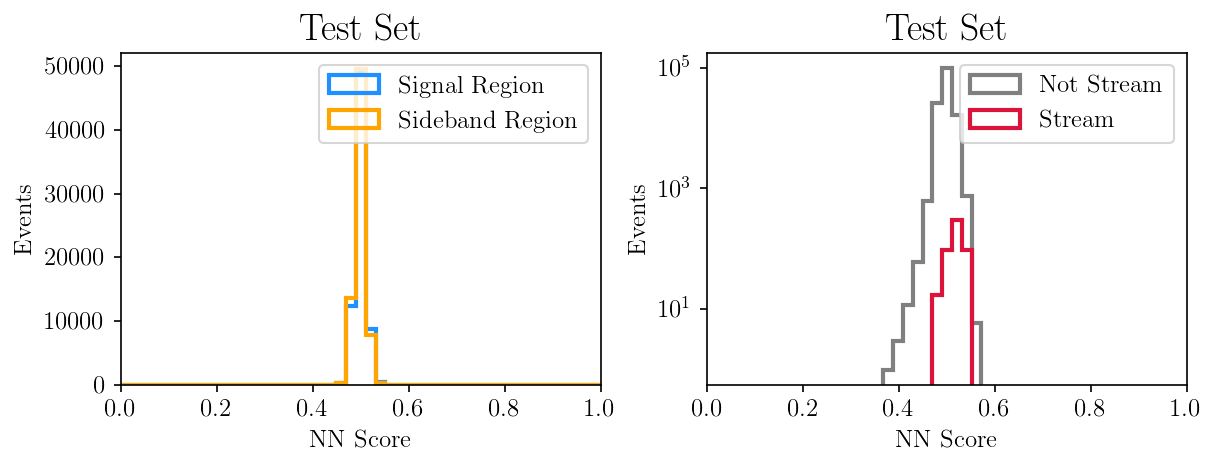

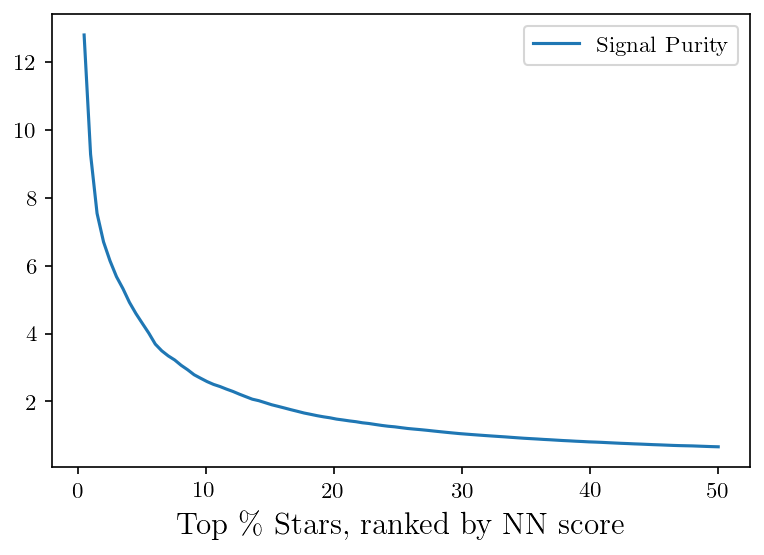

Top 50 stars: Purity = 16.0% 


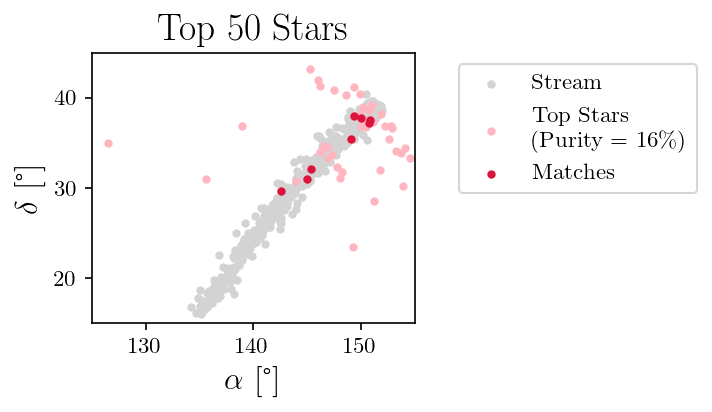

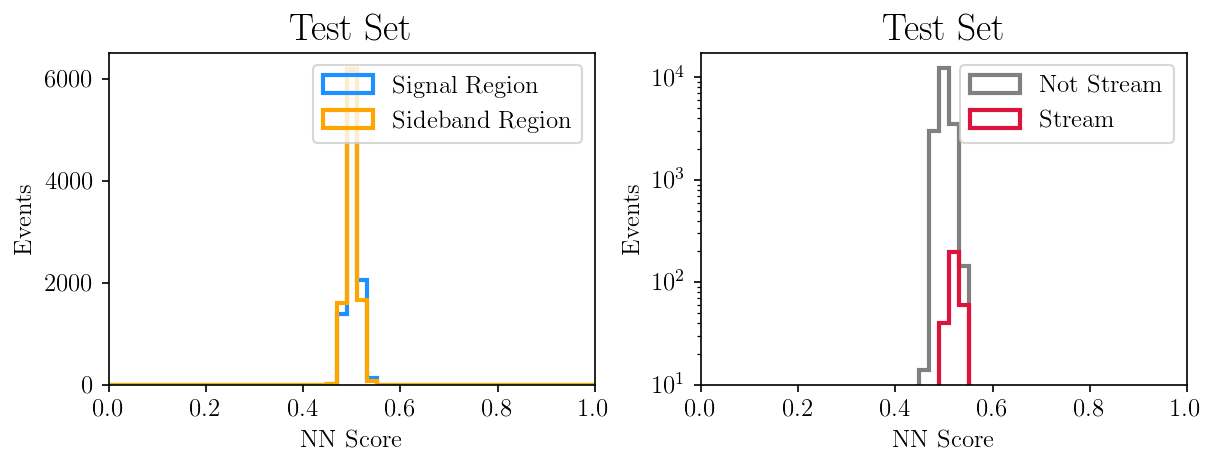

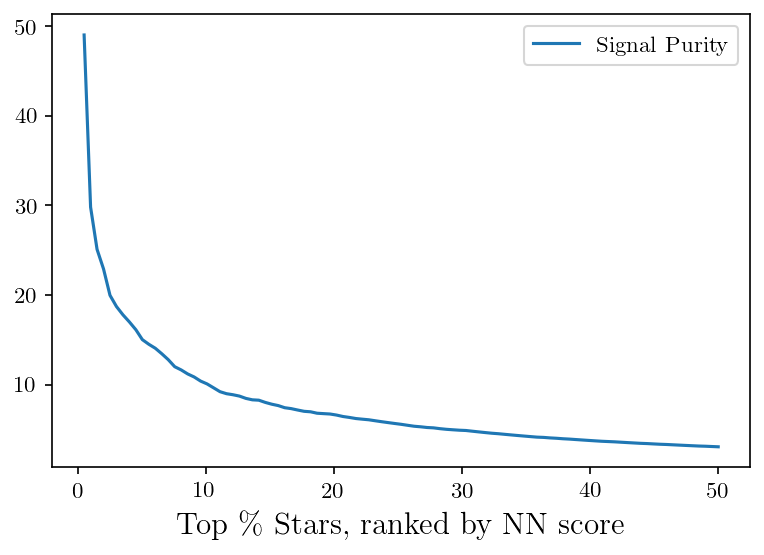

Top 50 stars: Purity = 64.0% 


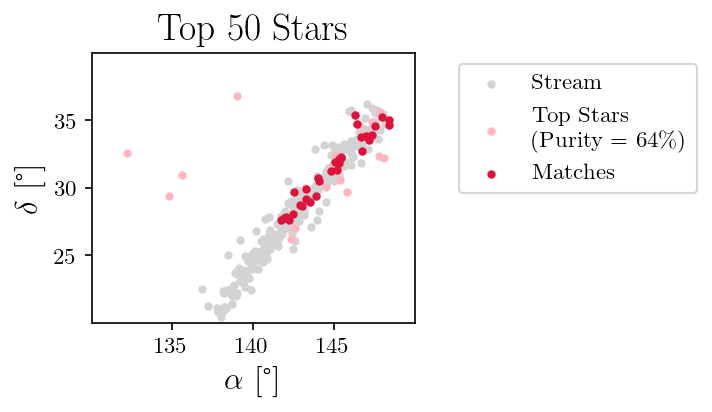

In [21]:
tf.keras.backend.clear_session()
test = train(df, 
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 32, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 100, 
      patience = 20, 
      save_folder = "gd1",
      verbose=False,
    )